In [1]:
import torch
import PIL
import glob

import numpy as np
import  matplotlib.pyplot as plt

from src.data import LungDataset, blend, Pad, Crop, Resize

In [2]:
t = torch.ones(1, 1, 100, 100)

In [3]:
torch.nn.ConvTranspose2d(1, 1, 3, 2, 1, 1)(t).size()

torch.Size([1, 1, 200, 200])

In [4]:
data_folder = "input/dataset/"
origins_folder = data_folder + "images/"
masks_folder = data_folder + "masks/"
models_folder = "models/"
images_folder = "images/"

In [5]:
origins_list = list(map(lambda n: n.replace(origins_folder, "").replace(".png", ""), glob.glob(origins_folder + "*.png")))
masks_list = list(map(lambda n: n.replace(masks_folder, "").replace(".png", ""), glob.glob(masks_folder + "*.png")))

In [6]:
origin_mask_list = [(mask_name.replace("_mask", ""), mask_name) for mask_name in masks_list]

In [8]:
%%time 

overall_dataset = LungDataset(origin_mask_list, origins_folder, masks_folder)
sizes = []
lung_areas = []

for origin, mask in overall_dataset:
    sizes.append(mask.size())
    lung_areas.append(mask.sum().item())


CPU times: user 3min 48s, sys: 26 s, total: 4min 14s
Wall time: 2min 14s


In [500]:
image_area = [w * h for w, h in sizes]

(array([ 10.,  13., 119., 183., 241.,   0.,   0.,   0.,   0., 138.]),
 array([ 1241195. ,  3083659.5,  4926124. ,  6768588.5,  8611053. ,
        10453517.5, 12295982. , 14138446.5, 15980911. , 17823375.5,
        19665840. ]),
 <a list of 10 Patch objects>)

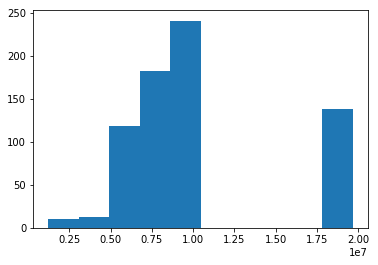

In [505]:
plt.hist(image_area)

(array([365., 230.,  83.,  26.]),
 array([ 100000., 2075000., 4050000., 6025000., 8000000.]),
 <a list of 4 Patch objects>)

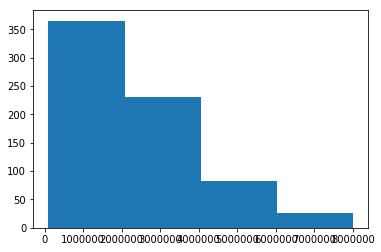

In [13]:
plt.hist(lung_areas, np.linspace(100000, 8000000, 5))